<a href="https://colab.research.google.com/github/gaurangdave/mnist_object_detection/blob/main/notebooks/03_google_colab_migration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Object Detection

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.datasets import fetch_openml
from keras.datasets import mnist


import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import PIL.Image


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


# Data Access

## Set Constants  

In [3]:
data_dir = Path("data")
models_dir = Path("models")

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Data Generation

## Bounding Box Generation

In [7]:
## helper function to plot the mnist data instances
def plot_numbers(image_df, num_of_columns = 5):
    ## lets render each image to do a quick visual inspection
    num_instances = image_df.shape[0]
    num_of_rows = int(num_instances / num_of_columns) + (1 if int(num_instances % num_of_columns) > 0 else 0)
    fig,axs = plt.subplots(num_of_rows,num_of_columns,figsize=(10,3))
    axs = axs.ravel()
    for idx in range(0,num_instances,1):
        if(type(image_df) == np.ndarray):
            image_data = image_df[idx]
        else:
            image_data = image_df.iloc[idx].values  # MNIST images are 28x28 pixels
        # Render the image using Matplotlib
        axs[idx].imshow(image_data)  # Use 'gray' colormap to render grayscale


    plt.axis("off") # Remove axes for better visualization
    plt.show()

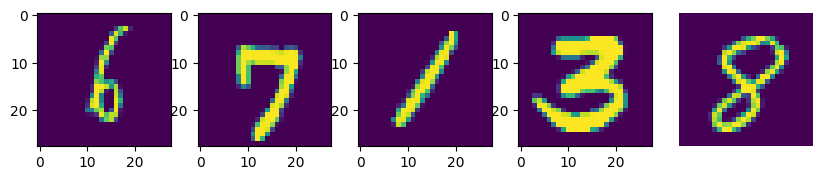

In [11]:
random_indices = np.random.choice(len(x_train), size=5, replace=False)
sample_images = x_train[random_indices]

plot_numbers(sample_images)

# Training & Evaluation

# Test Data Validation